# Testing DRL algorithm 

##### Import overview of needed libraries

In [1]:
import os, sys

sys.path.append('stage_2/envs/')

from ReceiverEnvWithArbitaryOrderIIRwithDelayedTargetSNR import ReceiverEnvWithArbitaryOrderIIRwithDelayedTargetSNR


##### Parameters for Environment

In [2]:
ORDER = 2                               
CUT_OFF_FREQ = 5_000
INTERFERENCE_CENTER_FREQ = 15_000
S=100
SAMPLING_FREQ=44_100

audio_json = 'stage_1/audio_files/audio_files.json'



In [3]:
env = ReceiverEnvWithArbitaryOrderIIRwithDelayedTargetSNR(
        order = ORDER,
        S = S,
        cut_off_freq = CUT_OFF_FREQ,
        interference_center_freq = INTERFERENCE_CENTER_FREQ,
        interference_scalar = 1,#interference_scalars[i],
        zero_magnitude_mapping = None,
        gradient = None,
        fix_zeros_magnitude = False,
        automatic_gain = False,
        SNR_as_dB = True,
        show_effect = True,   
        audio_json = 'stage_1/audio_files/audio_files.json' 

)

creating action space with 5 dimensions...


###### DDPG network

In [4]:
from DDPGwithCustomNetDepths import DDPGAgentwithCustomNetworkDepths

model = DDPGAgentwithCustomNetworkDepths(
    input_dims  = env.observation_space.shape,
            n_actions   = env.action_space.shape[0],
            alpha       = 0.0001, # learning rate of actor
            beta        = 0.001,  # learning rate of critic
            gamma       = 0,      # ***** decreasing the discounting factor *****
            tau         = 0.001,
            critic_dims = [[256], [512, 256], []],
            actor_dims  = [256, 128],
            batch_size  = 256,
            buffer_size = 4_000,
            noise       = 0.01,
            action_activation = 'sigmoid',
            
)

2024-02-09 11:05:30.678555: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 11:05:31.311057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 11:05:31.311155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 11:05:31.417329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 11:05:31.684819: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 11:05:31.692248: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
from stage2_helper import train, test



In [6]:
train(model, env, audio_num=0, max_num_steps=4000)



--------------------------------------------------episode no: 1--------------------------------------------------
audio name: 'vignesh-target-MONO'
sampling rate: 44100 Hz
audio shape: (136476,)
data type: int16
MONO audio file...
generating the target signal...
	truncating the spectrum at 5000Hz
	trimming the audio signal...
		truncating the audio at lower 0 and upper -1 indices
generating the jammed signal...
	creating a non-overlapping interference signal with target spectrum shifted to 15000Hz with scales 1.0
step: 1, SNR: 1.5198189122688288, filter: 0.49619972705841064, [0.49619973 0.00900842 0.1270255 ], [ 1.         -0.01235849  0.23642374]
step: 2, SNR: 0.735016296975124, filter: 0.4937829375267029, [ 0.49378294 -0.00058754  0.12260725], [1.         0.08023838 0.25640672]


/home/ceribro/.local/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


step: 3, SNR: 1.2200025962460697, filter: 0.5092365741729736, [0.50923657 0.01690556 0.12190383], [1.         0.02137686 0.25598924]
step: 4, SNR: 1.257759327528415, filter: 0.49732640385627747, [ 4.97326404e-01 -7.10099307e-05  1.25485391e-01], [ 1.         -0.00397925  0.25615012]
step: 5, SNR: 1.654759210880623, filter: 0.5004024505615234, [0.50040245 0.0166214  0.12930338], [ 1.         -0.01913458  0.25257664]
step: 6, SNR: 0.8462037580527338, filter: 0.5094351768493652, [ 0.50943518 -0.00370037  0.12229749], [1.         0.03564238 0.25701506]
step: 7, SNR: 1.356119621849337, filter: 0.5005085468292236, [0.50050855 0.00329443 0.12512934], [ 1.         -0.00550407  0.24246623]
step: 8, SNR: 1.226909691990836, filter: 0.5042296648025513, [0.50422966 0.02461616 0.13435166], [1.         0.05712126 0.2481576 ]
step: 9, SNR: 1.1740940999299148, filter: 0.5076784491539001, [ 0.50767845 -0.00732382  0.13208358], [ 1.         -0.00412113  0.25046251]
step: 10, SNR: 1.3233123638965814, filt

([1.5198189122688288,
  0.735016296975124,
  1.2200025962460697,
  1.257759327528415,
  1.654759210880623,
  0.8462037580527338,
  1.356119621849337,
  1.226909691990836,
  1.1740940999299148,
  1.3233123638965814,
  0.9786224902372892,
  0.8472101636537409,
  1.4166185882201865,
  1.5744414037838572,
  0.8053447552956943,
  0.9708548374374366,
  1.2005542797343378,
  0.7308101086549306,
  0.856470852246068,
  0.9976245755632813,
  1.2808061867577152,
  1.1989724322400617,
  1.1479653117665605,
  0.9427770413865857,
  0.5698944806760857,
  0.9831102213372613,
  0.8577794935739609,
  1.2073820854178132,
  1.3314309620883293,
  1.5372289598753641,
  1.7163180109899585,
  1.1564330611046472,
  1.2061189724448047,
  1.254621402913426,
  1.5452062958615227,
  1.2447542483691454,
  1.2158175356325498,
  1.0893706313809641,
  1.2393038254694044,
  1.0259282536328282,
  1.3190650082355426,
  1.690250009109688,
  1.016388038050344,
  1.7467017197647448,
  1.0645652812730633,
  1.361764723024556

In [7]:
rewards, actions = test(model , env, audio_num=0,num_steps=4000)


--------------------------------------------------episode no: 1--------------------------------------------------
audio name: 'vignesh-target-MONO'
sampling rate: 44100 Hz
audio shape: (136476,)
data type: int16
MONO audio file...
generating the target signal...
	truncating the spectrum at 5000Hz
	trimming the audio signal...
		truncating the audio at lower 0 and upper -1 indices
generating the jammed signal...
	creating a non-overlapping interference signal with target spectrum shifted to 15000Hz with scales 1.0
step: 1, SNR: 11.311556195384586, filter: 0.29772496223449707, [0.29772496 0.1250647  0.27595809], [ 1.         -0.49295296  0.07972482]
step: 2, SNR: 11.087495792275078, filter: 0.29467445611953735, [0.29467446 0.13009025 0.27626296], [ 1.        -0.5007921  0.0813876]
step: 3, SNR: 11.047559910580437, filter: 0.29849469661712646, [0.2984947  0.12581163 0.2778166 ], [ 1.         -0.49631433  0.0810129 ]
step: 4, SNR: 11.339220047912589, filter: 0.2948004901409149, [0.2948004

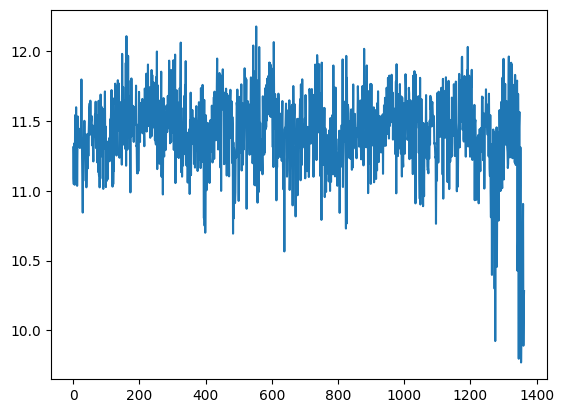

In [8]:
import matplotlib.pyplot as plt

plt.plot(rewards)